In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

from condastats.cli import overall

In [2]:
data = overall(['dask', 'distributed', 'numpy', 'pandas', 'airflow', 'vaex', 'ray', 'pyspark', 'modin'] , start_month="2017-01", end_month="2021-12", monthly=True)

In [3]:
data = data.reset_index(level=[0,1])

In [4]:
data.head()

,pkg_name,time,counts
0,dask,2017-01,64062
1,dask,2017-02,79414
2,dask,2017-03,100800
3,dask,2017-04,130140
4,dask,2017-05,136451


In [5]:
data['time'] = pd.to_datetime(data['time'])

In [6]:
table = pd.pivot_table(data, values='counts', index='time', columns='pkg_name')

In [7]:
table.head()

pkg_name,dask,distributed,numpy,pandas,pyspark,vaex,ray,airflow,modin
time,,,,,,,,,
2017-01-01,64062,7420,464875,253587,0,0,0,0,0
2017-02-01,79414,17265,574706,287581,0,0,0,0,0
2017-03-01,100800,13380,713001,305028,34,45,0,0,0
2017-04-01,130140,34864,639419,374032,371,302,5,0,0
2017-05-01,136451,41902,652633,421278,904,207,3,59,0


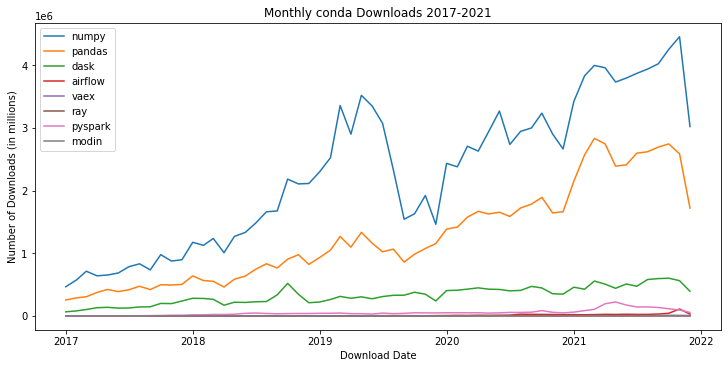

In [8]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

ax.plot(table.index, table['numpy'], label='numpy')
ax.plot(table.index, table['pandas'], label='pandas')
ax.plot(table.index, table['dask'], label='dask')
ax.plot(table.index, table['airflow'], label='airflow')
ax.plot(table.index, table['vaex'], label='vaex')
ax.plot(table.index, table['ray'], label='ray')
ax.plot(table.index, table['pyspark'], label='pyspark')
ax.plot(table.index, table['modin'], label='modin')

ax.set_xlabel('Download Date')
ax.set_ylabel('Number of Downloads (in millions)')
ax.set_title("Monthly conda Downloads 2017-2021")
ax.legend()

In [9]:
# fig.savefig("pydata-overall.png", transparent=True)

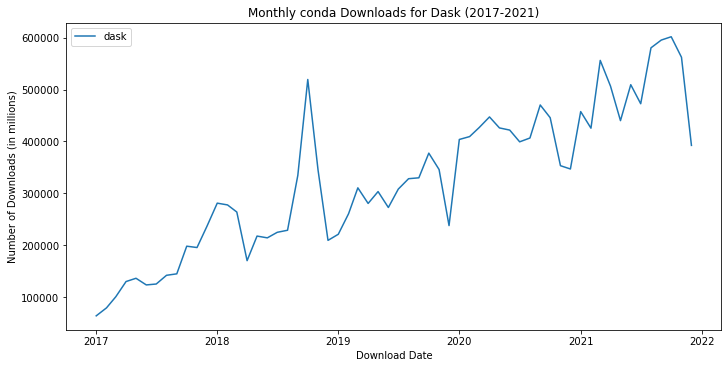

In [10]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.plot(table.index, table['dask'], label='dask')
ax.set_xlabel('Download Date')
ax.set_ylabel('Number of Downloads (in millions)')
ax.set_title("Monthly conda Downloads for Dask (2017-2021)")
ax.legend()

In [11]:
# fig.savefig("dask-overall.png", transparent=True)

### Year-wise changes in the past three months

In [12]:
table.head()

pkg_name,dask,distributed,numpy,pandas,pyspark,vaex,ray,airflow,modin
time,,,,,,,,,
2017-01-01,64062,7420,464875,253587,0,0,0,0,0
2017-02-01,79414,17265,574706,287581,0,0,0,0,0
2017-03-01,100800,13380,713001,305028,34,45,0,0,0
2017-04-01,130140,34864,639419,374032,371,302,5,0,0
2017-05-01,136451,41902,652633,421278,904,207,3,59,0


In [18]:
def change_per_year(m):
    # Parameter m: month as int. Example: for Jan, m= 1
    month = table.iloc[lambda x: x.index.month == m]
    month.index = month.index.year

    df_roll = month.rolling(2).mean()
    df_perc = (month.diff().div(df_roll) * 100).iloc[1:].round(2).astype(str) + '%'

    final = month.astype(str) + " (" + df_perc + ")"
    final.drop(index=2017, inplace=True)
    return final

In [19]:
change_per_year(12).to_html("files/conda-metrics-dec-2021.html")

In [29]:
change_per_year(10).to_markdown()

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [34]:
!conda install tabulate --yes

Solving environment: done

## Package Plan ##

  environment location: /Users/pavithra/mambaforge/envs/demos

  added / updated specs:
    - tabulate


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tabulate-0.8.9             |     pyhd8ed1ab_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          26 KB

The following NEW packages will be INSTALLED:

  tabulate           conda-forge/noarch::tabulate-0.8.9-pyhd8ed1ab_0



tabulate-0.8.9       | 26 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
